In [1]:
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable ,Chain, config

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
D = 100
N = 2
xdata = np.random.randn(D*N)\
              .reshape(D,N).astype(np.float32)

In [4]:
def f(x):
    y = x*x
    return y

In [5]:
tdata = (xdata[:,1] > f(xdata[:,0])).astype(np.int32)

In [6]:
C = 2
NN = Chain(l1=L.Linear(N,C))

In [7]:
def model(x):
    y = NN.l1(x)
    return y

In [8]:
ydata = model(xdata)
print(ydata)

variable([[ 0.09587427 -0.44211966]
          [-0.09967683 -0.95811117]
          [-0.73653734 -2.0558238 ]
          [-0.12059036 -1.1387476 ]
          [ 0.6281551   1.097607  ]
          [ 0.27781802 -0.18827036]
          [ 0.26987994  0.6377397 ]
          [ 0.3529021   0.7854722 ]
          [-0.03844298  0.6398839 ]
          [-0.68035996 -1.4483454 ]
          [-0.29183614  1.5142581 ]
          [ 0.01951127 -1.2489679 ]
          [ 0.35314745  0.37023115]
          [ 0.19066224 -0.07979311]
          [ 0.34407228 -0.10213882]
          [ 0.9357681   2.279248  ]
          [-0.45256445 -1.0442754 ]
          [ 0.5893167   1.9324312 ]
          [ 0.4932999   1.6013756 ]
          [-0.28333575 -0.9541515 ]
          [-0.577527   -1.6332164 ]
          [-0.27746117  0.41579935]
          [-0.48380306 -0.9888369 ]
          [-0.1959585  -1.0677271 ]
          [ 0.13509706  0.83511704]
          [-0.18827    -0.8252933 ]
          [ 0.21593139  0.85657847]
          [-0.17934078 -0.40

In [9]:
acc = F.accuracy(ydata,tdata)
print(acc)

variable(0.73)


In [10]:
optNN = Opt.SGD()
optNN.setup(NN)

In [11]:
loss_series = []
acc_series = []

In [12]:
T = 5000
for time in range(T):
    config.train = True
    optNN.target.zerograds()
    ydata = model(xdata)
    loss = F.softmax_cross_entropy(ydata,tdata)
    acc = F.accuracy(ydata,tdata)
    loss.backward()
    optNN.update()
    
    loss_series.append(loss.data)
    acc_series.append(acc.data)

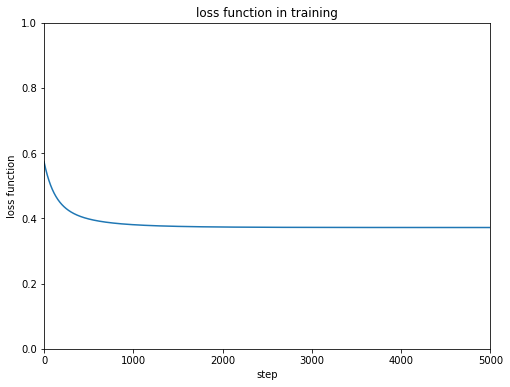

In [13]:
Tall = len(loss_series)
plt.figure(figsize=(8,6))
plt.plot(range(Tall),loss_series)
plt.title("loss function in training")
plt.xlabel("step")
plt.ylabel("loss function")
plt.xlim([0,Tall])
plt.ylim([0,1])
plt.show()              

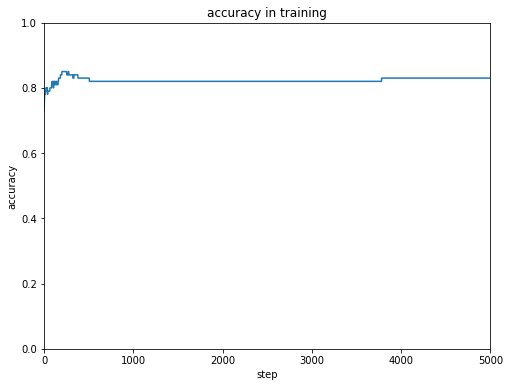

In [14]:
plt.figure(figsize=(8,6))
plt.plot(range(Tall),acc_series)
plt.title("accuracy in training")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.xlim([0,Tall])
plt.ylim([0,1])
plt.show()              

In [15]:
C = 2
NN = Chain(l1=L.Linear(N,4),l2=L.Linear(4,C))

In [16]:
def model(x):
    h = NN.l1(x)
    h = F.sigmoid(h)
    y = NN.l2(h)
    return y

In [17]:
optNN = Opt.SGD()
optNN.setup(NN)

In [18]:
loss_series = []
acc_series = []

In [19]:
T = 20000
for time in range(T):
    config.train = True
    optNN.target.zerograds()
    ydata = model(xdata)
    loss = F.softmax_cross_entropy(ydata,tdata)
    acc = F.accuracy (ydata,tdata)
    loss.backward()
    optNN.update()
    
    loss_series.append(loss.data)
    acc_series.append(acc.data)

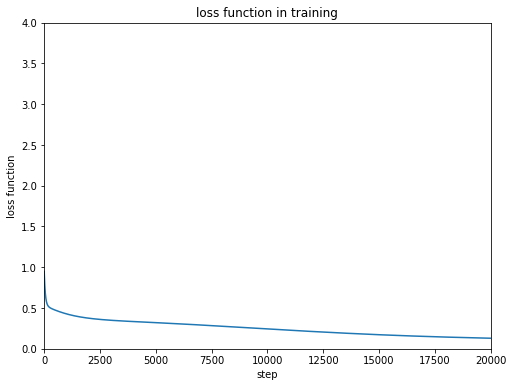

In [20]:
Tall = len(loss_series)
plt.figure(figsize=(8,6))
plt.plot(range(Tall),loss_series)
plt.title('loss function in training')
plt.xlabel('step')
plt.ylabel('loss function')
plt.xlim([0,Tall])
plt.ylim([0,4])
plt.show()              

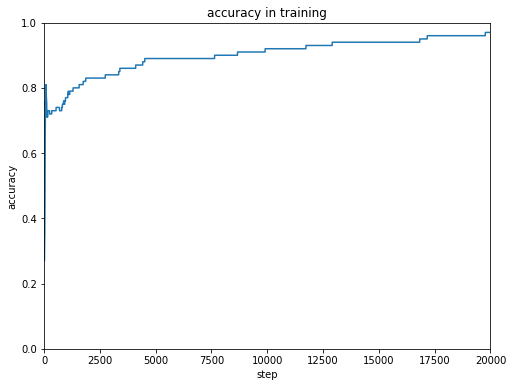

In [21]:
plt.figure(figsize=(8,6))
plt.plot(range(Tall),acc_series)
plt.title('accuracy in training')
plt.xlabel('step')
plt.ylabel('accuracy')
plt.xlim([0,Tall])
plt.ylim([0,1])
plt.show()              